In [44]:
%matplotlib inline
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

Part 1:

1. Apply PCA projection of the features of IRIS dataset in 2 dimensons.

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

2. Show scatter plot of the reduced dimension. Use separate color for each class of the data

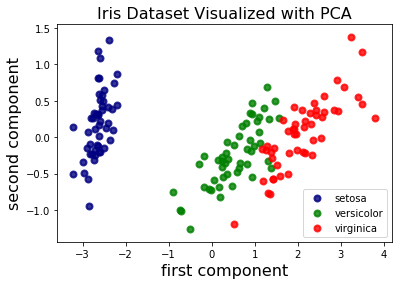

In [57]:
plt.figure()
colors = ['navy', 'green', 'red']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('Iris Dataset Visualized with PCA', fontsize=16)
    plt.xlabel('first component', fontsize=16)
    plt.ylabel('second component', fontsize=16)

3. Show how much variance ratio is explained by the reduced dimension.

In [63]:
explained_variance_pca = pca.explained_variance_ratio_

explained_variance_pca

array([0.92461872, 0.05306648])

In [28]:
# Principal Component 1 has a variance of 92.46%, while Principal Component 2 has a variance of 5.31%. Put together,
# both components contain 97.77% of the variance. Recall that PCA attempts to capture the most variance (information). This means
# 97.77% of the information is captured by the two principal components. 

Part 2:
1. Apply another reduction method on the features of IRIS dataset in 2 dimensons.

In [61]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

2. Show scatter plot of the reduced dimension. Use separate color for each class of the data.

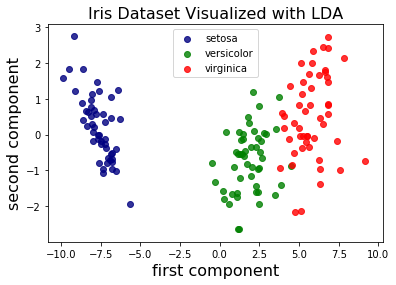

In [62]:
plt.figure()
colors = ['navy', 'green', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color, label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('Iris Dataset Visualized with LDA', fontsize=16)
    plt.xlabel('first component', fontsize=16)
    plt.ylabel('second component', fontsize=16)

3. Show how much variance ratio is explained by the reduced dimension.

In [64]:
explained_variance_lda = lda.explained_variance_ratio_

explained_variance_lda

array([0.9912126, 0.0087874])

In [ ]:
# Principal Component 1 has a variance of 99.12%, while Principal Component 2 has a variance of .88%. Put together,
# both components contain 100% of the variance.  

Part 3:
1. Compare the variance ratio explained by the 2-dimensions of the methods you have used. Which is better?

The PCA method helped transform the data from 4 dimensional to 2 dimensional. There was some data that was lost, which is shown by the 97.77% variance ratio that was calculated. PCA is a mathematical approach that essentially tries to separate points as far as possible based on the highest varying field.

The LDA method had a combined variance ratio of 100%. Both methods are fantastic for this specific data set, but it's clear the LDA method is superior by just comparing variance ratios.

2. Compare the scatter plot of the two methods after reduction. Which is a better method for separating the different classes of data?

Looking at the first plot (PCA), it's evident that Iris-setosa is very different from Iris-versicolor and Iris-virginica. All of the different classes are clearly separated from each other, and the differences between them can be easily analyzed. Generally speaking, this is the case for both plots. There is some slight overlap between green (versicolor) and red (virginica). 

LDA is very similar to PCA, except that this technique maximizes the ratio of between-class variance to the within-class variance in a set of data and thereby gives maximal separation between the classes. LDA and PCA are similar in the sense that both of them reduce the data dimensions but LDA provides better separation between groups of experimental data compared to PCA.

I could be wrong as I am still learning, but it's my understanding that both techniques have their own use cases and can be useful in different scenarios. When it comes to this particular data set, LDA seems slightly more effective at separating the groups of data as seen between areas with green (versicolor) and red (virginica). 

3. What is the primary difference between the two methods? Which method works better in this case and why?

PCA is a linear feature extraction technique. It allows for a linear mapping of the data to a lower-dimensional space so that the variance of the data in the low-dimensional representation is maximized. In essence, it combines input features in a manner in which the least important features are dropped while still retaining the most valuable features.

As stated above, LDA is very similar to PCA, except that this technique maximizes the ratio of between-class variance to the within-class variance in a set of data and thereby gives maximal separation between the classes. LDA and PCA are similar in the sense that both of them reduce the data dimensions but LDA provides better separation between groups of experimental data compared to PCA. This is because LDA models the differences between the classes of data, whereas PCA does not take account of these differences. 

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. The two principal components found are what's plotted.

I would say that LDA works better in this case. There's slightly less clustering and overlap in the data between the groups of experimental data. According to research online, in the case of uniformly distrubted data, LDA typically always performs better than PCA. However if the data is irregularly distributed (not the case in this dataset), then PCA is better as LDA may have a bias towards the majority class. Additionally, PCA can handle labeled as well as unlabeled data, whereas LDA requires labeled data (The data is clearly labeled in the iris dataset).